### Importing Data And Required Packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X= df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y=df['math_score']

In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

#### Transforming Columns into numerical columns and standardisatio

In [8]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor = ColumnTransformer(
  [
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
  ]
)

In [9]:
X=preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((700, 19), (300, 19))

In [19]:
def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mean_squared_error(true,predicted))
  r2_square= r2_score(true, predicted)
  return mae,rmse,r2_square

In [22]:
models={
  "Linear Regression": LinearRegression(),
  "Lasso": Lasso(),
  "Ridge": Ridge(),
  "K-Neighbors Regressor": KNeighborsRegressor(),
  "Decesion Tree": DecisionTreeRegressor(),
  "Randome Forest Regressor": RandomForestRegressor(),
  "XGBRegressor": XGBRegressor(),
  "Cat Boost regressor": CatBoostRegressor(),
  "Adaboost Regressor": AdaBoostRegressor()

}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)

  y_train_pred= model.predict(X_train)
  y_test_pred= model.predict(X_test)

  model_train_mae, model_train_rmse, model_train_r2= evaluate_model(y_train,y_train_pred)
  model_test_mae, model_test_rmse, model_test_r2= evaluate_model(y_test,y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])
  
  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print('----------------------------------')
  
  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)
  
  print('='*35)
  print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2677
- Mean Absolute Error: 4.2082
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6330
- Mean Absolute Error: 4.4779
- R2 Score: 0.8725


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6784
- Mean Absolute Error: 4.5037
- R2 Score: 0.8538
-----------------------

In [23]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"], ascending= False)

,Model Name,R2_Score
2,Ridge,0.875907
0,Linear Regression,0.872469
7,Cat Boost regressor,0.852108
5,Randome Forest Regressor,0.844815
8,Adaboost Regressor,0.833509
6,XGBRegressor,0.811816
1,Lasso,0.810281
3,K-Neighbors Regressor,0.772328
4,Decesion Tree,0.730572


### Linear Regression

In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.25


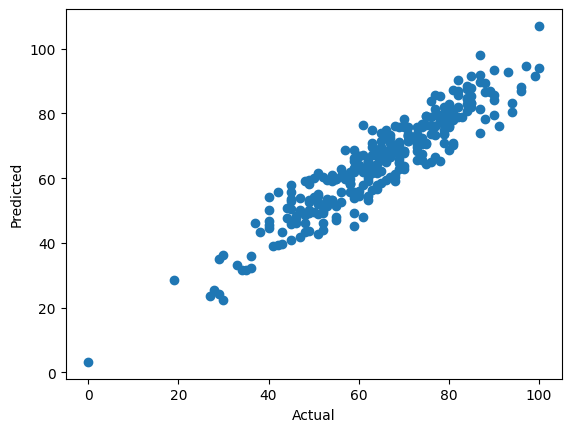

In [25]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math_score'>

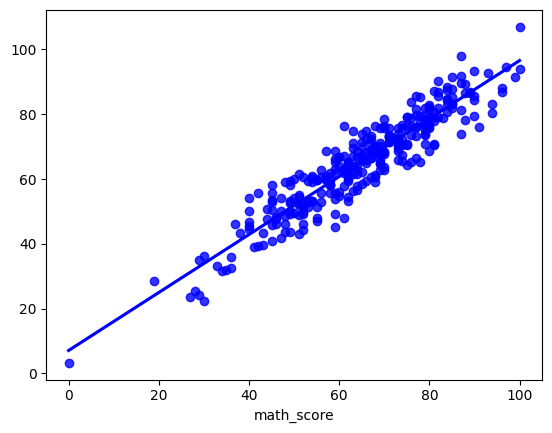

In [26]:
sns.regplot(x=y_test,y=y_pred, ci=None, color='blue')

### Diffrence Between Actual and predicted value

In [28]:
pred_df= pd.DataFrame({'Actual Value': y_test, 'Preducted value': y_test-y_pred})
pred_df

,Actual Value,Preducted value
521,91,14.875
737,53,-6.500
740,80,2.875
660,74,-2.750
411,84,-4.500
...,...,...
468,77,3.750
935,70,7.250
428,65,6.625
7,40,-4.500
